# Practica A2 AAMD


## 1. Lectura de les dades
Primer de tot, llegirem les dades dels nostres arxius TXT i els guardarem en dataframes.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import math
import seaborn as sns


df_real_og = pd.read_csv('data/A2-real.txt', sep=';')
df_synthetic_og = pd.read_csv('data/A2-synthetic.txt', sep=',')

datasets = {
    "real": df_real_og,
    "synthetic": df_synthetic_og
}

df_synthetic_og.head()

,x1,x2,x3,x4,class
0,-0.031676,-9.912054,-0.579436,-1.044239,1
1,0.002526,6.172456,3.288339,-1.006427,5
2,0.183123,-0.387841,6.236470,-1.691491,2
3,-0.042262,-1.996272,-1.655302,-2.995311,1
4,-0.062811,-0.417072,6.657475,-3.633134,4


## 2. Pre-processament de les dades
En aquest punt, ja que ja s'han tractat els dos conjunts de dades per a eliminar outliers, dades no físiques i dades incomplertes, només treurem dels nostres dataframes les columnes que no necessitem. En el cas de les dades reals, seràn les columnes de "Class" i "Location". En el cas de les dades sintètiques, serà la columna "class".

In [ ]:
df_real = df_real_og.drop(columns=["Class", "Location"])
df_synthetic = df_synthetic_og.drop(columns=["class"])

# Escalar les dades per a que totes totes les variables tinguin el mateix pes 
# (si no, si una variable té un rang numèric més gran, dominarà la variància encara que no sigui més important)
scaler = StandardScaler()
df_real_scaled = scaler.fit_transform(df_real)
df_syn_scaled = scaler.fit_transform(df_synthetic)

df_syn_scaled.head()

,x1,x2,x3,x4
0,-0.031676,-9.912054,-0.579436,-1.044239
1,0.002526,6.172456,3.288339,-1.006427
2,0.183123,-0.387841,6.236470,-1.691491
3,-0.042262,-1.996272,-1.655302,-2.995311
4,-0.062811,-0.417072,6.657475,-3.633134


## 3. Aplicar tècniques d’aprenentatge no supervisat
### • Principal Component Analysis (PCA)
Per aquesta tècnica d'aprenentatge haurem de trobar i representar gràficament la projecció PCA en dues dimensions, utilitzant un color diferent per a cada classe, i fer un “scree plot” de la variància acumulada.
PCA és una tècnica que redueix la dimensionalitat de les dades, i projecta les dades originals a noves variables "components principals" que expliquen la major variància possible.
#### Dades reals

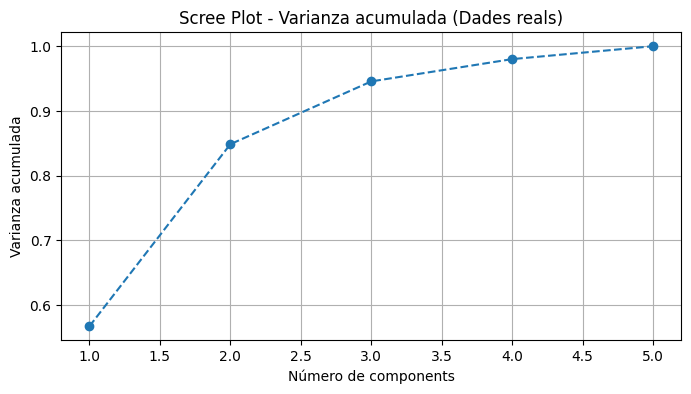

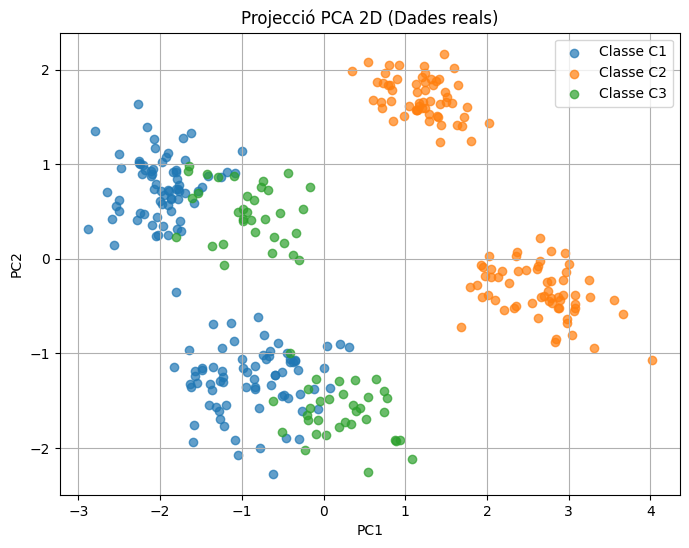

In [ ]:
x_real = df_real.copy()

# Classe i localització de les dades reals per després fer la visualització de dades
y_real = df_real_og['Class']
loc_real = df_real_og['Location']



# Apliquem PCA
pca_real = PCA()
x_real_pca = pca_real.fit_transform(x_real_scaled)

# Scree plot de la variància acumulada
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(pca_real.explained_variance_ratio_)+1), pca_real.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Scree Plot - Variància acumulada (Dades reals)')
plt.xlabel('Número de components')
plt.ylabel('Variància acumulada')
plt.grid(True)
plt.show()

# 6. Visualización PCA 2D coloreando por clase
plt.figure(figsize=(8, 6))
for clase in sorted(y_real.unique()):
    idx = y_real == clase
    plt.scatter(x_real_pca[idx, 0], x_real_pca[idx, 1], label=f'Classe {clase}', alpha=0.7)

plt.title('Projecció PCA 2D (Dades reals)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

Com podem observar al Scree Plot de les dades reals, cada component captura la màxima variància possible en les dades, augmentant la variància acumulada. Això és degut a que el PCA construeix cada component principal de forma que maximiza la variança no explicada pels components anterior, per tant a cada component que es suma, sempre aportarà informació adicional (encada que a menor mesura).

En la representació 2D de les dades reals, es projecten les dades sobre els primers components principals (PC1 i PC2), que capturen la major part de la variança del conjunt original. Hem utilitzat la columna "classe" de les dades reals (no utilitzada per l'aprenentatge) per diferenciar amb colors els grups separats. 
A la classe 2, per exemple, es veu molt clarament com el PCA ha reduit la dimensionalitat mantenint una bona part de la estructura, però amb les classes 1 i 3 es veu que algunes dades es solapen entre elles. Això podria ser per similituds estructurals entre aquestes classes, o limitacions del mètode PCA.

#### Dades sintètiques

In [ ]:
x_synthetic = df_synthetic.copy()

# Classe per visualitzar
y_synthetic = df_synthetic_og['class']



# PCA
pca_syn = PCA()
X_syn_pca = pca_syn.fit_transform(X_syn_scaled)

# Scree plot
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(pca_syn.explained_variance_ratio_)+1),
         pca_syn.explained_variance_ratio_.cumsum(),
         marker='o', linestyle='--')
plt.title('Scree Plot - Varianza acumulada (Datos sintéticos)')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.grid(True)
plt.show()

# 6. Visualització PCA 2D
plt.figure(figsize=(8, 6))
for clase in sorted(y_synthetic.unique()):
    idx = y_synthetic == clase
    plt.scatter(X_syn_pca[idx, 0], X_syn_pca[idx, 1], label=f'Clase {clase}', alpha=0.7)

plt.title('Proyección PCA 2D (Datos sintéticos)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

### • t-distributed Neighbor Stochastic Embedding (t-SNE)


### • k-means


### • Agglomerative Hierarchical Clustering (AHC)


### • Autoencoder


### • Self-Organizing Maps (SOM)
